In [1]:
import shift_detector
from shift_detector.detector import Detector
from shift_detector.checks.dq_metrics_check import DQMetricsCheck
from shift_detector.checks.distinction_check import DistinctionCheck
from shift_detector.checks.sorensen_dice_check import SorensenDiceCheck
from shift_detector.checks.conditional_probabilities_check import ConditionalProbabilitiesCheck
from shift_detector.checks.embedding_distance_check import EmbeddingDistanceCheck
from shift_detector.checks.word_prediction_check import WordPredictionCheck
from shift_detector.checks.statistical_checks.numerical_statistical_check import NumericalStatisticalCheck
from shift_detector.checks.statistical_checks.categorical_statistical_check import CategoricalStatisticalCheck
from shift_detector.checks.statistical_checks.text_metadata_statistical_check import TextMetadataStatisticalCheck
from shift_detector.checks.lda_check import LdaCheck

2019-07-04 09:49:45,044 [INFO]  'pattern' package not found; tag filters are not available for English
Using TensorFlow backend.
W0704 09:49:45.888351 140736180102016 deprecation_wrapper.py:119] From /Users/pzimme/Documents/projects/deequ/shift-detector/shift_detector/precalculations/word_prediction_precalculation.py:12: The name tf.set_random_seed is deprecated. Please use tf.compat.v1.set_random_seed instead.



In [2]:
import pandas as pd
df = pd.read_csv('./data/pokedex.csv')

# double df
df = pd.concat([df, df], axis=1)
new_cols = []
for i in range(len(df.columns)):
    new_cols.append(df.columns[i] + '_' + str(i))
df.columns = new_cols

df1 = df.head(300)
df2 = df.tail(721-300)

In [3]:
# df1.loc[df['#'] > 49, '#'] = None
# df1

In [4]:
from shift_detector.utils.column_management import ColumnType
custom_column_types = {
#     'Legendary': ColumnType.categorical,
    'Type 1': ColumnType.categorical,
    'Type 2': ColumnType.categorical,
    'Generation': ColumnType.categorical,
}
detector = Detector(df1, df2, **custom_column_types)

Numerical columns: Sp. Atk_22, Generation_11, Generation_25, HP_5, Speed_24, Total_18, Attack_6, HP_19, Defense_21, Total_4, Defense_7, Speed_10, Attack_20, #_0, Sp. Def_9, Sp. Def_23, #_14, Sp. Atk_8
Categorical columns: Legendary_26, Legendary_12
Text columns: Type 2_3, Entry_27, Name_1, Type 2_17, Type 1_2, Type 1_16, Name_15, Entry_13
Used columns: #_0, Name_1, Type 1_2, Type 2_3, Total_4, HP_5, Attack_6, Defense_7, Sp. Atk_8, Sp. Def_9, Speed_10, Generation_11, Legendary_12, Entry_13, #_14, Name_15, Type 1_16, Type 2_17, Total_18, HP_19, Attack_20, Defense_21, Sp. Atk_22, Sp. Def_23, Speed_24, Generation_25, Legendary_26, Entry_27


In [5]:
dc = DistinctionCheck(num_epochs=10, relative_threshold=0.2)
cp = ConditionalProbabilitiesCheck(min_support=0.01, min_confidence=0.01, rule_limit=10,
                                   min_delta_supports=0.01, min_delta_confidences=0.01)
sdc = SorensenDiceCheck(n=1)
edc = EmbeddingDistanceCheck()
nsc = NumericalStatisticalCheck()
csc = CategoricalStatisticalCheck()
tmc = TextMetadataStatisticalCheck()
dqm = DQMetricsCheck()

In [6]:
detector.run(dqm)

Executing DQMetricsCheck
- Executing DQMetricsPrecalculation
- Executing LowCardinalityPrecalculation


# OVERVIEW

'Executed 1 checks'

,Column,# Shifts detected,# Checks Executed
0,Generation_25,2,2
1,Generation_11,2,2
2,Sp. Atk_22,1,1
3,HP_5,1,1
4,#_14,1,1
5,#_0,1,1
6,HP_19,1,1
7,Sp. Atk_8,1,1
8,Legendary_12,1,2
9,Legendary_26,1,2


# DETAILS

## DQ Metrics Check

Examined Columns: ['Sp. Atk_22', 'HP_5', 'Total_18', 'Attack_6', 'Legendary_12', 'Sp. Def_9', 'Generation_25', 'Sp. Def_23', '#_14', 'Speed_24', 'Legendary_26', '#_0', 'Attack_20', 'Generation_11', 'HP_19', 'Defense_21', 'Defense_7', 'Sp. Atk_8', 'Speed_10', 'Total_4', 'Generation_11', 'Generation_25', 'Legendary_26', 'Legendary_12']
Shifted Columns: ['Generation_11', 'Sp. Atk_22', 'HP_5', 'HP_19', '#_0', 'Generation_25', '#_14', 'Sp. Atk_8', 'Generation_11', 'Generation_25', 'Legendary_26', 'Legendary_12']



### Numerical Columns

Column '#_0':


,Metric,Val in DS1,Val in DS2,Threshold,Relative Diff
0,mean,150.50,511.00,+/- 15.0 %,+239.53 %
1,median,150.50,511.00,+/- 15.0 %,+239.53 %
2,quartile_1,75.75,406.00,+/- 20.0 %,+435.97 %
3,quartile_3,225.25,616.00,+/- 20.0 %,+173.47 %
4,std,86.75,121.68,+/- 25.0 %,+40.27 %




Column '#_14':


,Metric,Val in DS1,Val in DS2,Threshold,Relative Diff
0,mean,150.50,511.00,+/- 15.0 %,+239.53 %
1,median,150.50,511.00,+/- 15.0 %,+239.53 %
2,quartile_1,75.75,406.00,+/- 20.0 %,+435.97 %
3,quartile_3,225.25,616.00,+/- 20.0 %,+173.47 %
4,std,86.75,121.68,+/- 25.0 %,+40.27 %




Column 'Generation_11':


,Metric,Val in DS1,Val in DS2,Threshold,Relative Diff
0,mean,1.66,4.51,+/- 15.0 %,+171.59 %
1,median,1.00,5.00,+/- 15.0 %,+400.0 %
2,quartile_1,1.00,4.00,+/- 20.0 %,+300.0 %
3,quartile_3,2.00,5.00,+/- 20.0 %,+150.0 %
4,std,0.74,1.00,+/- 25.0 %,+34.68 %
5,num_distinct,3.00,4.00,+/- 20.0 %,+33.33 %




Column 'Generation_25':


,Metric,Val in DS1,Val in DS2,Threshold,Relative Diff
0,mean,1.66,4.51,+/- 15.0 %,+171.59 %
1,median,1.00,5.00,+/- 15.0 %,+400.0 %
2,quartile_1,1.00,4.00,+/- 20.0 %,+300.0 %
3,quartile_3,2.00,5.00,+/- 20.0 %,+150.0 %
4,std,0.74,1.00,+/- 25.0 %,+34.68 %
5,num_distinct,3.00,4.00,+/- 20.0 %,+33.33 %




Column 'HP_19':


,Metric,Val in DS1,Val in DS2,Threshold,Relative Diff
0,quartile_1,45.75,55.0,+/- 20.0 %,+20.22 %




Column 'HP_5':


,Metric,Val in DS1,Val in DS2,Threshold,Relative Diff
0,quartile_1,45.75,55.0,+/- 20.0 %,+20.22 %




Column 'Sp. Atk_22':


,Metric,Val in DS1,Val in DS2,Threshold,Relative Diff
0,quartile_1,40.0,50.0,+/- 20.0 %,+25.0 %




Column 'Sp. Atk_8':


,Metric,Val in DS1,Val in DS2,Threshold,Relative Diff
0,quartile_1,40.0,50.0,+/- 20.0 %,+25.0 %


### Categorical Columns

Attribute 'Generation_11':


,Attribute Value,Val in DS1,Val in DS2,Threshold,Relative Diff
0,1.0,0.50,0,+/- 5.0 %,+50.33 %
1,2.0,0.33,0,+/- 5.0 %,+33.33 %




Attribute 'Generation_25':


,Attribute Value,Val in DS1,Val in DS2,Threshold,Relative Diff
0,1.0,0.50,0,+/- 5.0 %,+50.33 %
1,2.0,0.33,0,+/- 5.0 %,+33.33 %




Attribute 'Legendary_12':


,Attribute Value,Val in DS1,Val in DS2,Threshold,Relative Diff
0,False,0.97,0.91,+/- 5.0 %,+5.79 %




Attribute 'Legendary_26':


,Attribute Value,Val in DS1,Val in DS2,Threshold,Relative Diff
0,False,0.97,0.91,+/- 5.0 %,+5.79 %





num 0, col #_0
num 1, col #_14
num 2, col Attack_20
num 3, col Attack_6
num 4, col Defense_21
num 5, col Defense_7
num 6, col Generation_11
num 7, col Generation_25
num 8, col HP_19
num 9, col HP_5


/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):
/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2366: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return list(data) if isinstance(data, collections.MappingView) else data


num 10, col Sp. Atk_22
num 11, col Sp. Atk_8
num 12, col Sp. Def_23
num 13, col Sp. Def_9
num 14, col Speed_10
num 15, col Speed_24
num 16, col Total_18
num 17, col Total_4


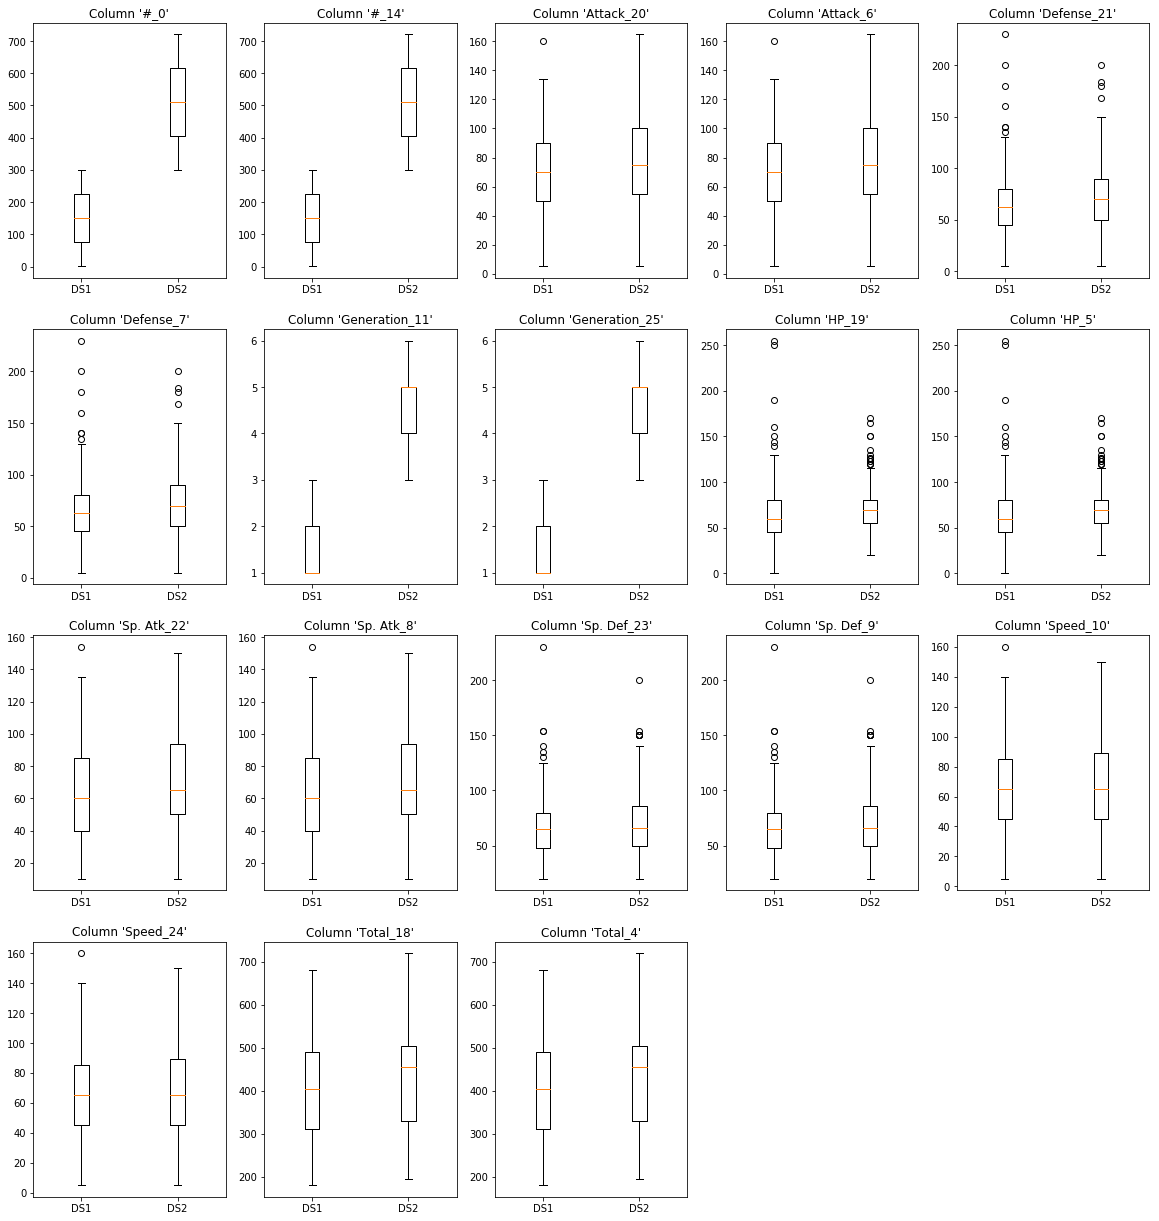

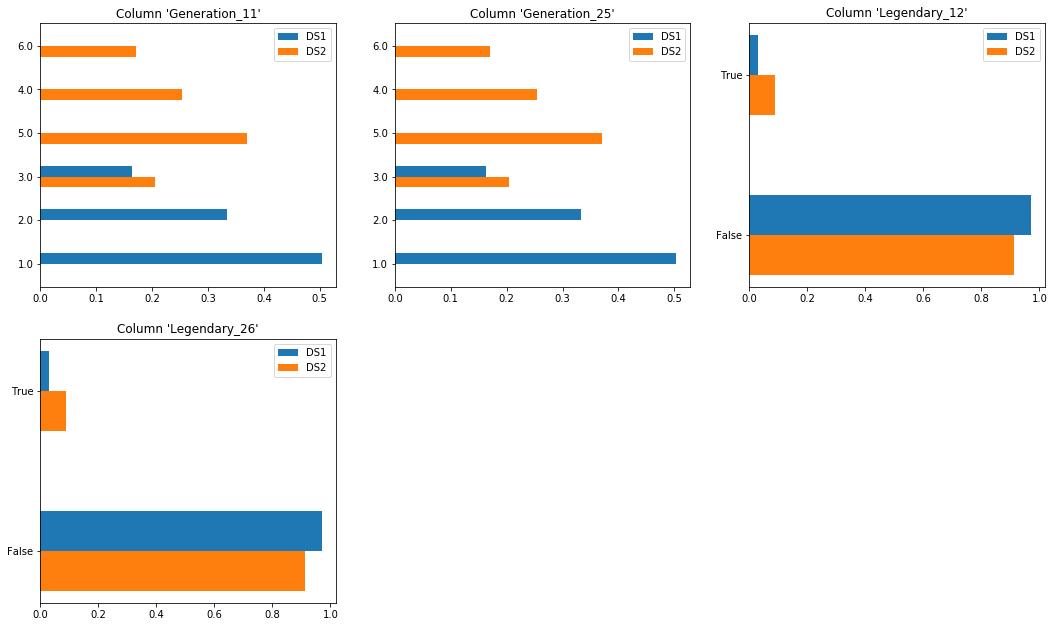

In [7]:
detector.evaluate()